In [1]:
import os
import numpy as np
import json
import pandas as pd

import matplotlib 
matplotlib.use('SVG')

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (13, 3)
plt.rcParams['font.size'] = 10
# plt.rcParams['font.monospace']

# UNCOMMENT TO ENABLE INTERACTIVITY
# import mpld3
# mpld3.enable_notebook()

import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("bright")

In [2]:
from session import Session

In [3]:
%load_ext autoreload
%autoreload 2

**Загрузка файла с сессией**

С передачей пути к файлу:

In [4]:
session = Session()
session.load("session.json")

Session successfully loaded from file
Session of type 4, found 164 frames


С передачей уже загруженного файла в виде объекта файла:

In [5]:
with open("session.json", 'r') as f:
    session = Session(f) 

Session successfully loaded from path
Session of type 4, found 164 frames


С передачей уже загруженного файла в виде json-строки:

In [6]:
with open("session.json", "rt") as f:
    test_str = f.read()
    
session = Session(input_file_or_path=test_str, is_json=True)

Session successfully loaded from JSON string
Session of type 4, found 164 frames


**Вывод стандартной информации о сессии:**

In [7]:
session.show_info()

exercise_description      : Кулак-виктори-
кольцо    
exercise_id               : 4                        
exercise_instruction      : Упражнение состоит из двух этапов
и займет чуть меньше минуты
exercise_instructionTime  : 0                        
exercise_mode             : number                   
exercise_name             : Упражнение 4             
exercise_type             : first                    
expected_gestures         : [5, 4, 3]                
fps                       : 6.24428876028            
n_gestures                : 17                       
progress                  : 20                       
skippedGesturesNumber     : 0                        
startDateTime             : 2017-10-07T10:38:13.788+03:00[Asia/Riyadh]


**Вычисление статистик по наборам вероятностей:**

In [8]:
session.show_stats()

speed      : 0.952     


**Построение графиков вероятностей:** 

Отдельно для жестов:

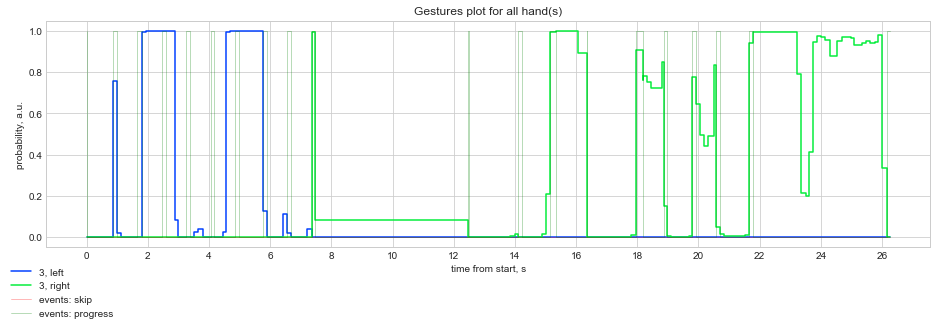

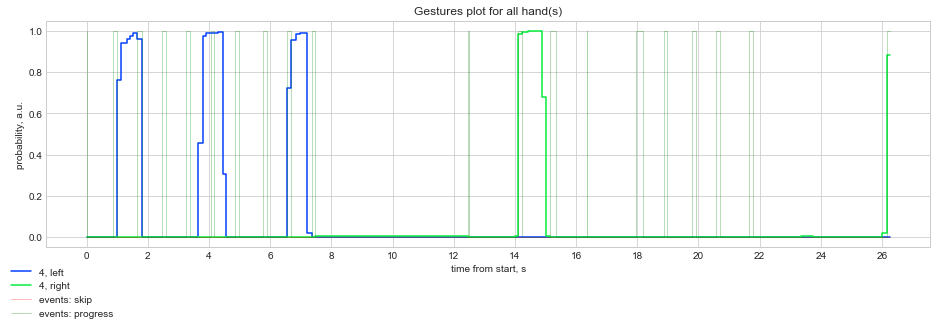

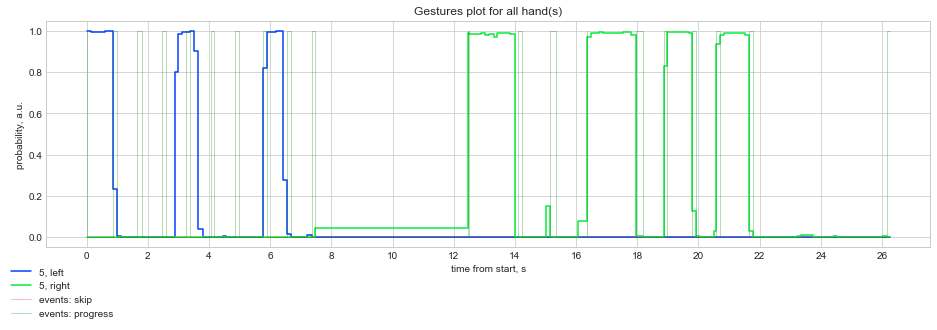

In [9]:
session.plot(gestures="expected", hands="all", separate="gestures", show_events=True)

Отдельно для рук:

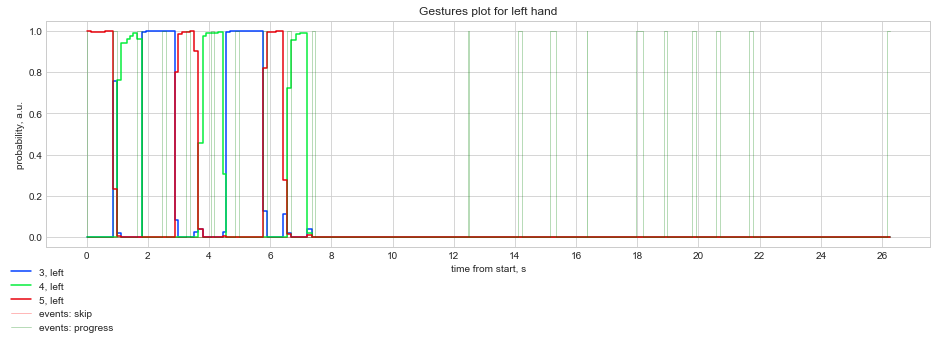

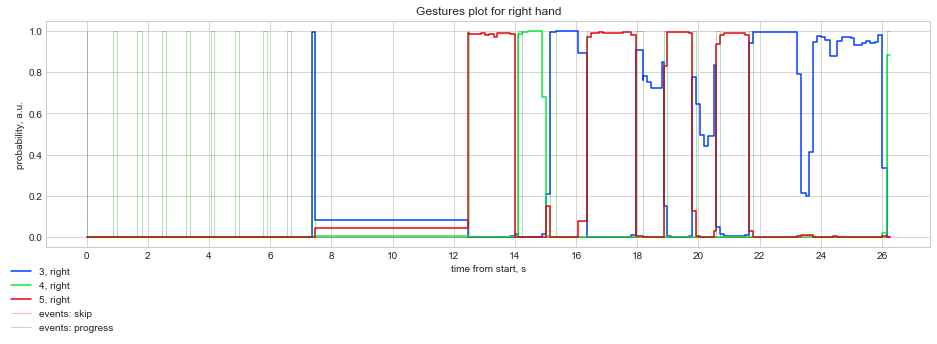

In [10]:
session.plot(gestures="expected", hands="all", separate="hands", show_events=True)

Отдельно для рук и жестов:

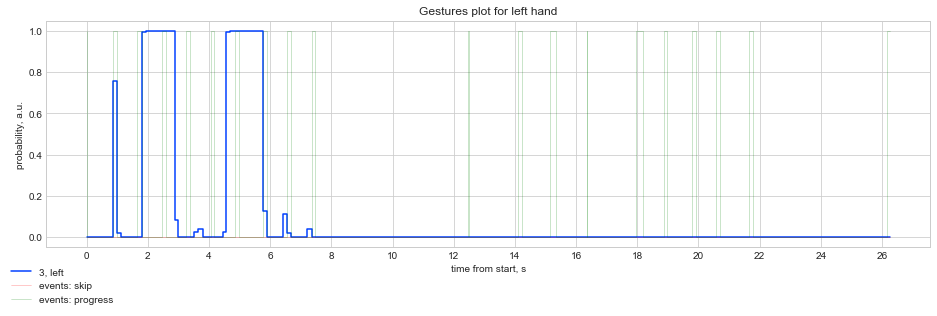

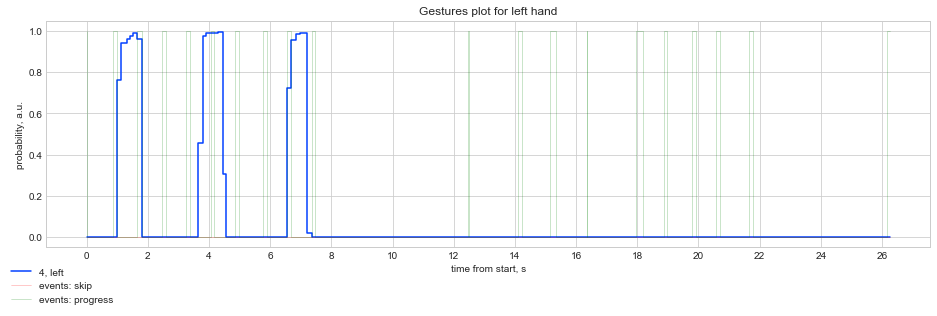

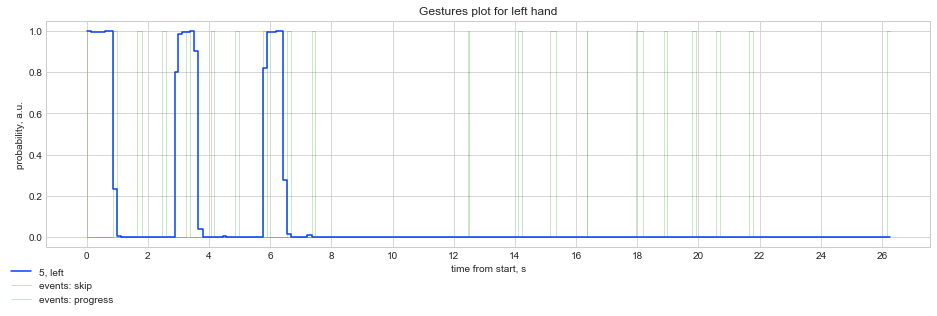

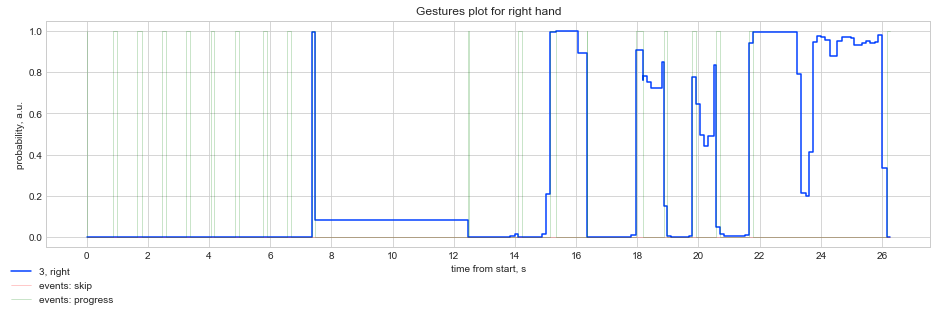

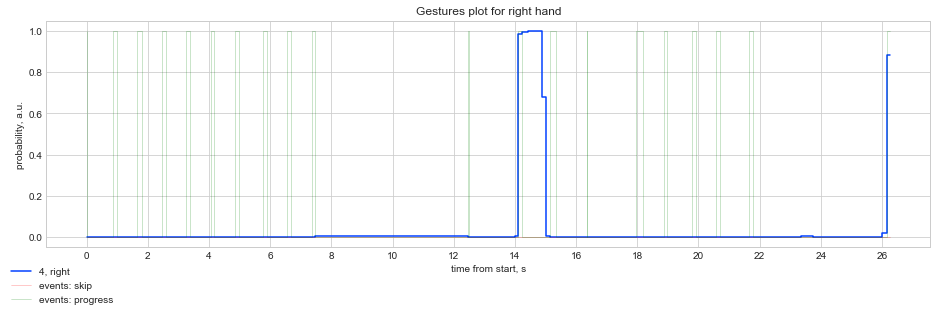

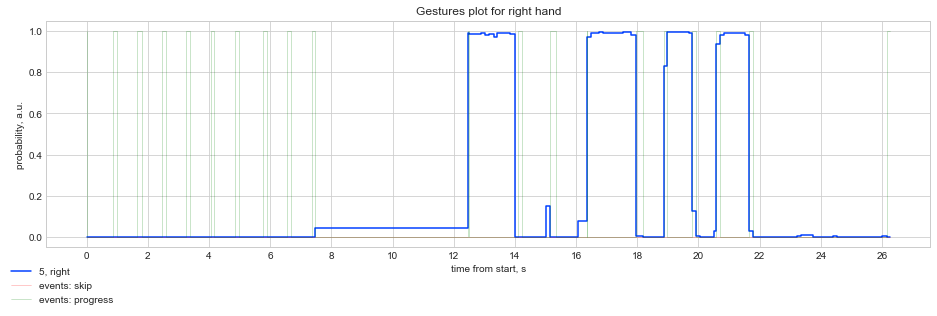

In [11]:
session.plot(gestures="expected", hands="all", separate="all", show_events=True)

**Построение графиков событий отдельно вместе / по отдельности:**

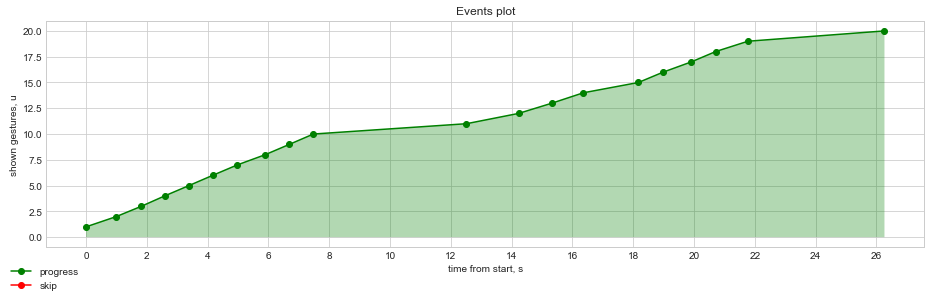

In [12]:
session.plot_events(separate=False)

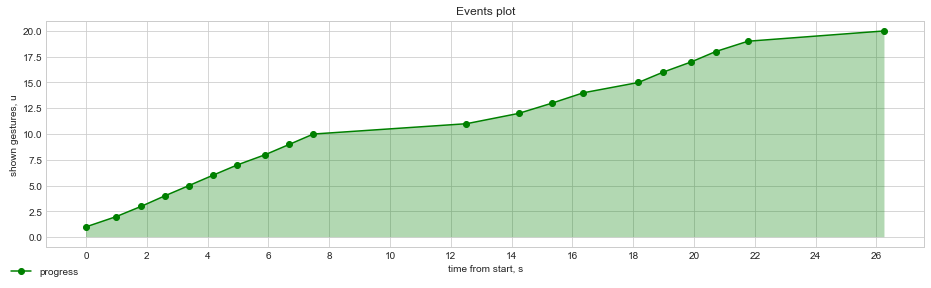

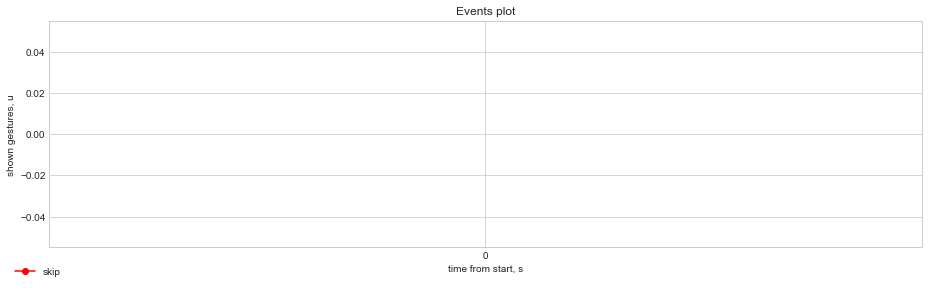

In [13]:
session.plot_events(separate=True)

При работе в тетрадках `Jupyter Notebook` можно использовать функцию для построения интерактивных графиков (появляется возможность менять масштаб нажатием на лупу и выбирать отдельные графики нажатием на легенду:

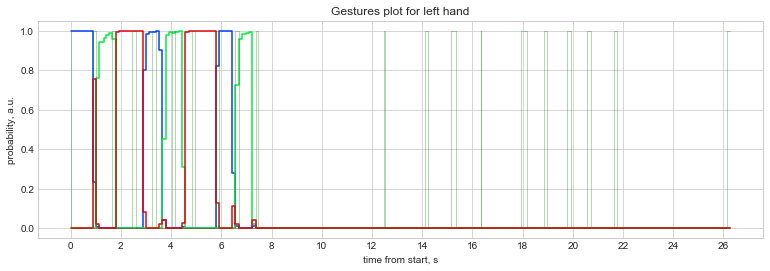

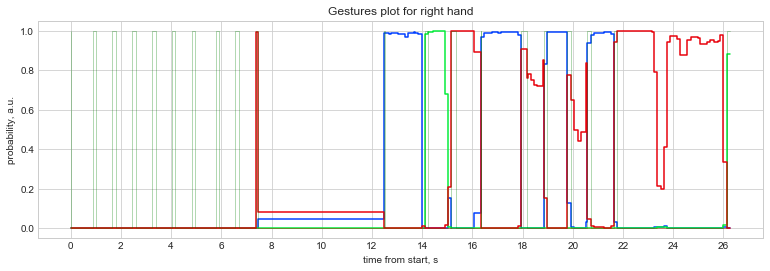

In [14]:
import mpld3
mpld3.enable_notebook()
session.plot_interactive(gestures='expected', hands="all")
mpld3.disable_notebook()

**Вывод последовательностей показанных жестов (`-1` означает отсуствие жеста в кадре для данной руки):**

In [15]:
session.sequence

{'left': array([ 5,  3,  4,  3,  5,  4,  1,  3,  5,  0,  4,  1, -1]),
 'right': array([-1,  3,  7,  5,  1,  4,  1,  3,  5,  3,  5,  3, 11,  3,  5,  3, 12,
         3,  4])}

Можно преобразовать к виду, использующему названия жестов:

In [16]:
print(" - ".join([session.gesture_names[g] for g in session.sequence["left"]]))

FIST-SIDE - RING - V - RING - FIST-SIDE - V - PALM-TOP - RING - FIST-SIDE - FIST-TOP - V - PALM-TOP - NOTHING


In [17]:
print(" - ".join([session.gesture_names[g] for g in session.sequence["right"]]))

NOTHING - RING - GOAT - FIST-SIDE - PALM-TOP - V - PALM-TOP - RING - FIST-SIDE - RING - FIST-SIDE - RING - POINTER - RING - FIST-SIDE - RING - GOAT-INV - RING - V
